<a href="https://colab.research.google.com/github/JoaquinJustelP/Python_UB/blob/main/Cluster_comparisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

sns.set(style='white',rc={'figure.figsize':(9,9)})

## Make fake noisy data

In [2]:
def make_sine(n):
    x = np.linspace(0,2*np.pi,n)
    y = np.sin(x) + np.random.random(n) * 0.4
    x = x.reshape(n,1)
    y = y.reshape(n,1)
    xy = np.concatenate((x,y), axis=1)
    return xy

def make_noisy_data(random_state=42):
    np.random.seed(random_state)
    # random normal blobs
    c1 = np.random.normal(loc=(0,4), scale=0.2, size=(100,2))
    c2 = np.random.normal(loc=(-4,-2), scale=0.7, size=(200,2))
    
    moons = datasets.make_moons(n_samples=200, noise=0.05)[0][:,:2]
    moons[:,0] += 0.8  # shift x axis
    moons[:,1] -= 3  # shift y axis
    
    sine = make_sine(100)
    # background noise
    noise = 14 * np.random.random_sample(size=(500, 2)) - 7  
    # concat all the points in two columns (v for vertical)
    C = np.vstack((c1, c2, noise, moons, sine))
    # normalize between 0-1
    C = (C - C.min()) / (C.max() - C.min())
    return C

In [3]:
data = make_noisy_data(12)

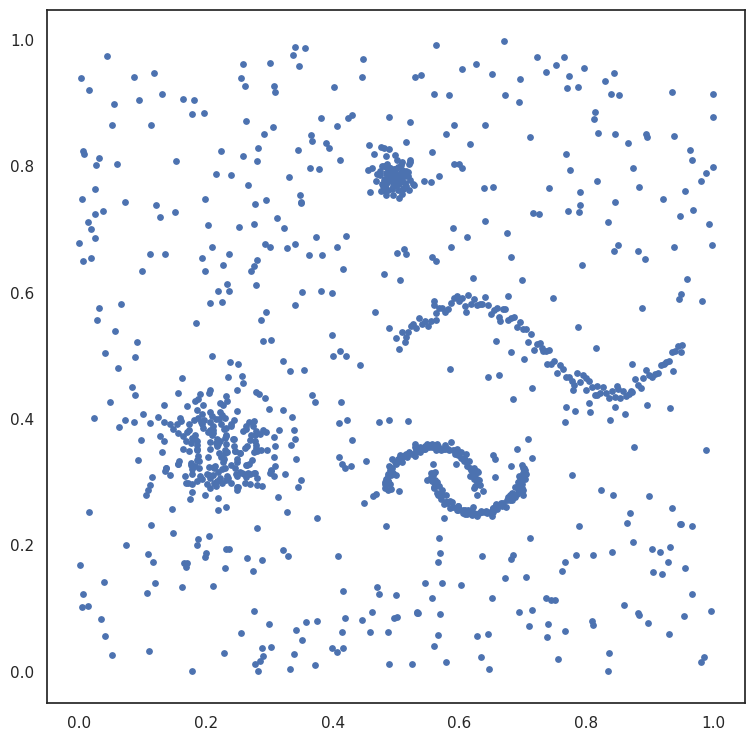

In [4]:
plt.scatter(data.T[0], data.T[1], s=15)

-----------------

In [5]:
from sklearn import cluster

In [6]:
def plot_clusters(data, clusterer):
    start_time = time.time()
    labels = clusterer.fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('husl', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    
    if hasattr(clusterer, 'probabilities_'):
        colors = [sns.desaturate(x, p) for x, p in zip(colors, clusterer.probabilities_)]
    
    sizes = [25 if x >= 0 else 5 for x in labels]
    
    plt.scatter(data.T[0], data.T[1], c=colors, s=sizes,  alpha=1)
    
    plt.title('Clusters found by {}'.format(str(clusterer.__class__.__name__)), fontsize=22)
    print('time:', end_time - start_time)

## k-means

In [7]:
kmeans = cluster.KMeans(n_clusters=4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


time: 0.6390349864959717


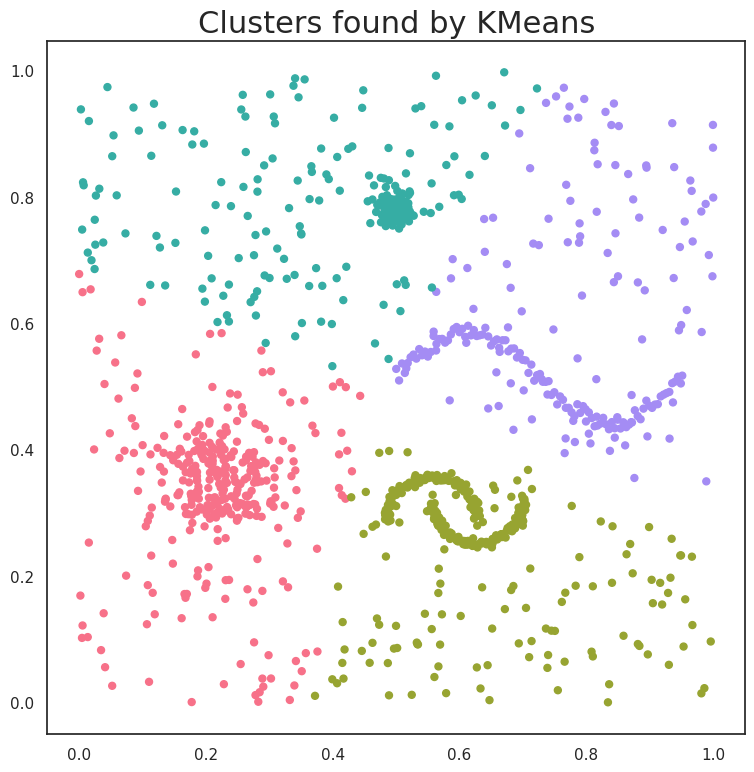

In [8]:
plot_clusters(data, kmeans)

## Affinity Propagation

In [9]:
affinityprop = cluster.AffinityPropagation()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


time: 10.533672571182251


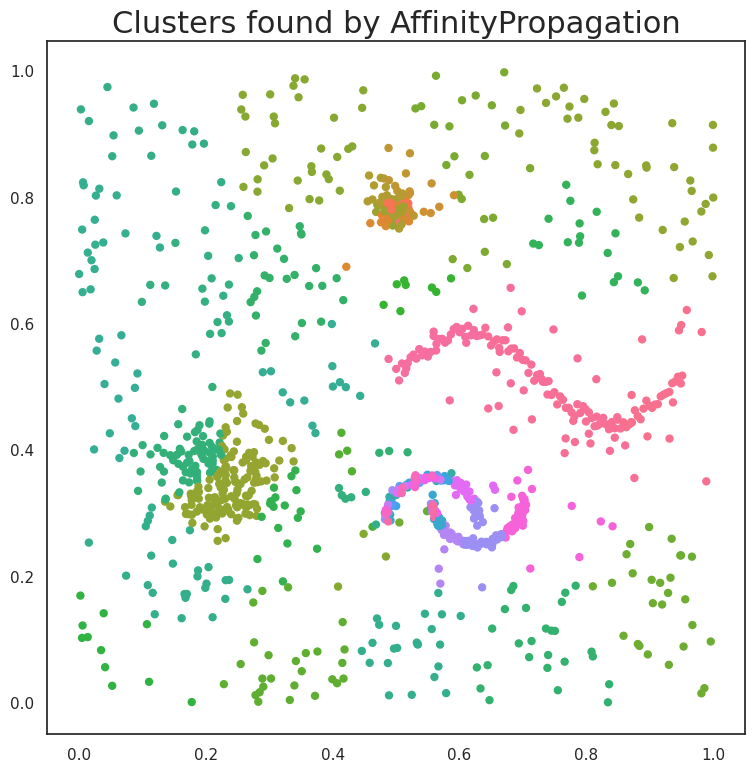

In [10]:
plot_clusters(data, affinityprop)

## Agglomerative clustering

In [11]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=5)

In [ ]:
plot_clusters(data, agglomerative)

time: 0.18439126014709473


In [ ]:
spectral = cluster.SpectralClustering(n_clusters=4)

In [ ]:
plot_clusters(data, spectral)

## Mean Shift

In [ ]:
meanshift = cluster.MeanShift(0.18, cluster_all=False)

In [ ]:
plot_clusters(data, meanshift)

-----

## Density based clusters

In [ ]:
import hdbscan

In [ ]:
%%time
sns.kdeplot(data[:,0],data[:,1], shade=True, gridsize=700, cmap='viridis')

## DBSCAN

In [ ]:
dbscan = cluster.DBSCAN(eps=0.02, min_samples=5)

In [ ]:
plot_clusters(data, dbscan)

## HDBSCAN

In [ ]:
hdb = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=11)

In [ ]:
plot_clusters(data, hdb)

Since we have the points probability of being member of a cluster we can set a threshold.

For example we only want points that have more than 50% chance of being part of a cluster

In [ ]:
# get the probability for every point
probs = hdb.fit(data).probabilities_

In [ ]:
clean_clusters = data[probs >= 0.6]
plt.scatter(clean_clusters.T[0], clean_clusters.T[1], s=20)
plt.xlim(0,1)
plt.ylim(0,1)

Now it's nice, clean and without noise!

-----